## Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the dataset

In [2]:
event=pd.read_csv(r"C:\Users\Mahesh\Desktop\DS Project\incident_event_log.csv")
event.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


We have '?' in some of the columns and we have to replace it with nan values.

In [3]:
event.shape

(141712, 36)

There are 1,41,712 rows and 32 columns in our dataset

In [4]:
event.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [5]:
event.duplicated().sum()

0

There are no duplicated entries.

In [6]:
#Get the data types of all the features
event.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

In [7]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

## Data cleaning

In [8]:
#Create a copy of the original dataset
incident=event.copy()

In [9]:
#Replace '?' with Nan values
incident.replace('?',np.nan,inplace=True)

In [10]:
#Number of null values in ascending order
incident.isnull().sum().sort_values(ascending=False)

caused_by                  141689
vendor                     141468
cmdb_ci                    141267
rfc                        140721
problem_id                 139417
sys_created_at              53076
sys_created_by              53076
u_symptom                   32964
assigned_to                 27496
assignment_group            14213
opened_by                    4835
resolved_at                  3141
closed_code                   714
resolved_by                   226
subcategory                   111
category                       78
location                       76
caller_id                      29
reassignment_count              0
active                          0
incident_state                  0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
opened_at                       0
closed_at                       0
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
impact        

In [11]:
#Percentage of null values
null_perc=incident.isnull().sum()/incident.shape[0]*100
null_perc.sort_values(ascending=False)

caused_by                  99.983770
vendor                     99.827820
cmdb_ci                    99.685983
rfc                        99.300694
problem_id                 98.380518
sys_created_at             37.453427
sys_created_by             37.453427
u_symptom                  23.261262
assigned_to                19.402732
assignment_group           10.029496
opened_by                   3.411849
resolved_at                 2.216467
closed_code                 0.503839
resolved_by                 0.159478
subcategory                 0.078328
category                    0.055041
location                    0.053630
caller_id                   0.020464
reassignment_count          0.000000
active                      0.000000
incident_state              0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
opened_at                   0.000000
closed_at                   0.000000
sys_updated_by              0.000000
s

We can see that the top five features have huge number of missing values. Also, closed_code is not useful for the model. Let us go ahead and remove them.

In [12]:
incident=incident.drop(['caused_by','vendor','cmdb_ci','rfc','problem_id','number','closed_code'],axis=1)

<AxesSubplot:>

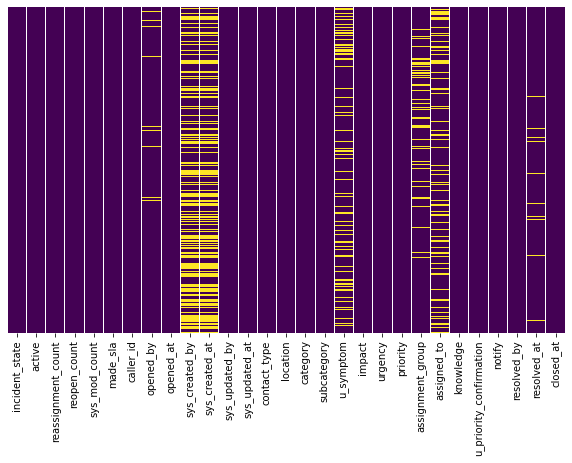

In [13]:
#Missing values
plt.figure(figsize=(10,6))
sns.heatmap(incident.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can see that sys_created_by and sys_created_at have missing values for the same records. assigned_to and u_symptom also have large number of missing values.

In [14]:
for col in ['reassignment_count','reopen_count','sys_mod_count']:
    print(col,': ',incident[col].nunique())

reassignment_count :  28
reopen_count :  9
sys_mod_count :  115


The above features identified under integer data type then found to be categorical datatypes having less number of unique values. Hence, we convert all int and bool dtypes to object. 

In [15]:
bool_int=['active','made_sla','knowledge','u_priority_confirmation','reassignment_count','reopen_count','sys_mod_count']
for col in bool_int:
    incident[bool_int]=incident[bool_int].astype('object')

In [16]:
for i in incident.columns:
    print(i," :-")
    print(incident[i].value_counts())
    print('==='*25)

incident_state  :-
Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64
active  :-
True     116726
False     24986
Name: active, dtype: int64
reassignment_count  :-
0     69876
1     37104
2     15097
3      8274
4      4614
5      2595
6      1447
7       985
8       574
9       365
10      285
11      174
12      108
13       61
14       45
15       21
17       16
20       16
16       13
18       13
22        9
19        8
21        3
27        3
26        2
23        2
24        1
25        1
Name: reassignment_count, dtype: int64
reopen_count  :-
0    139398
1      1918
2       190
3       107
4        48
5        24
6        18
7         5
8         4
Name: reopen_count, dtype: int64
sys_mod_count  :-
0      24913
1      22062
2      19749
3      1416

In [17]:
for i in incident.columns:
    print(i," :-",incident[i].nunique())

incident_state  :- 9
active  :- 2
reassignment_count  :- 28
reopen_count  :- 9
sys_mod_count  :- 115
made_sla  :- 2
caller_id  :- 5244
opened_by  :- 207
opened_at  :- 19849
sys_created_by  :- 185
sys_created_at  :- 11552
sys_updated_by  :- 846
sys_updated_at  :- 50664
contact_type  :- 5
location  :- 224
category  :- 58
subcategory  :- 254
u_symptom  :- 525
impact  :- 3
urgency  :- 3
priority  :- 4
assignment_group  :- 78
assigned_to  :- 234
knowledge  :- 2
u_priority_confirmation  :- 2
notify  :- 2
resolved_by  :- 216
resolved_at  :- 18505
closed_at  :- 2707


## Exploratory Data Analysis (EDA)

In [18]:
columns_to_change_to_datetime = ['closed_at', 'opened_at' ]

for i in columns_to_change_to_datetime:
    incident[i] = incident[i].astype('datetime64[ns]')

In [19]:
# life of a ticket in seconds
incident['ticket_life'] = (incident['closed_at'] - incident['opened_at']).dt.total_seconds()

In [20]:
# tickets opened after closing
# Filtering out the rows where the opened_at > closed_at

negative_life = incident[incident.ticket_life<0 ]
print('Number of tickets having negative life ',negative_life.shape[0])

#Percentage
perc = negative_life.shape[0]/incident.shape[0]*100
print('Percentage of negative life tickets: ',perc)

Number of tickets having negative life  50484
Percentage of negative life tickets:  35.62436490911144


35.62% of tickets have negative life. We will handle these tickets seperately and not use the same in the model building as this might affect the performance of the model.

In [21]:
#Include only genuine tickets
incident=incident[incident.ticket_life>0]
incident.shape

(91210, 30)

In [22]:
import datetime
from datetime import timedelta
temp = incident[['opened_at', 'sys_created_at']]
temp = temp.dropna().astype('datetime64[ns]')

#The gap or difference between opening time of the incident and system created time
temp['gap'] = temp.sys_created_at - temp.opened_at
print(temp.gap.mean())

#Calculate the mean of the gap and add this mean to fill the null values in sys_created_at
temp_mean = temp[temp.gap > datetime.timedelta(hours=0,minutes=0,seconds=0)].gap.mean()
print(temp_mean)

incident['sys_created_temp_mean'] = incident.opened_at + timedelta(minutes = 13, seconds=01.503258)
incident['sys_created_at'].fillna(value=incident['sys_created_temp_mean'],inplace=True)

-1 days +23:57:58.993122131
0 days 00:13:01.503258663


In [23]:
#Similarly fill the null values for the column resolved_at by taking the average difference between opened_at time and resolved_at time
temp2 = incident[['opened_at', 'resolved_at']]
temp2 = temp2.dropna()
temp2.resolved_at = temp2.resolved_at.astype('datetime64[ns]')

temp2['new'] = temp2.resolved_at - temp2.opened_at
print(temp2.new.mean())

temp2_mean = temp2[temp2.new > datetime.timedelta(hours=0,minutes=0,seconds=0)].new.mean()
print(temp2_mean)

incident['new2'] = incident['opened_at'] + datetime.timedelta(days=5,hours = 5, minutes=34, seconds=59.468314879)
incident['resolved_at'].fillna(value = incident.new2,inplace=True)

27 days 09:42:23.943725302
37 days 04:28:56.446437425


In [24]:
for col in ['sys_created_by','u_symptom','location','assigned_to','assignment_group','caller_id','category','subcategory','opened_by','resolved_by']:
    incident[col].fillna(incident[col].mode()[0],inplace=True)

In [25]:
incident.isnull().any().sum()

0

In [26]:
incident=incident.drop(['closed_at','ticket_life', 'sys_created_temp_mean','new2'],axis=1)
incident.shape

(91210, 28)

Now, there are no missing values in our dataset

In [27]:
#!pip install pandas-profiling==2.7.1

In [28]:
incident.describe(include='O')

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,sys_created_at,...,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,resolved_by,resolved_at
count,91210,91210,91210,91210,91210,91210,91210,91210,91210,91210,...,91210,91210,91210,91210,91210,91210,91210,91210,91210,91210
unique,9,2,23,9,115,2,4562,185,168,14592,...,3,3,4,76,226,2,2,2,206,13544
top,Active,True,0,0,0,True,Caller 1904,Opened by 17,Created by 10,2016-04-14 20:55:01.503258,...,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 17,False,False,Do Not Notify,Resolved by 15,3/6/2016 16:27
freq,24217,74868,45605,89673,16290,85963,1032,31191,50724,58,...,86397,86098,85033,37260,23142,80463,63778,91140,9281,68


In [29]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(incident, nGraphShown, nGraphPerRow):
    nunique = incident.nunique()
    incident = incident[[col for col in incident if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = incident.shape
    columnNames = list(incident)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = incident.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [30]:
# Scatter and density plots
def plotScatterMatrix(incident, plotSize, textSize):
    incident = incident.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    incident = incident.dropna('columns')
    incident = incident[[col for col in incident if incident[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(incident)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    incident = incident[columnNames]
    ax = pd.plotting.scatter_matrix(incident, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = incident.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [31]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# incident_event_log.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv(r"C:\Users\Mahesh\Desktop\DS Project\incident_event_log.csv", delimiter=',', nrows = nRowsRead)
df1.dataframeName = r"C:\Users\Mahesh\Desktop\DS Project\incident_event_log.csv"
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 36 columns


<ipython-input-29-43a57d38883d>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-29-43a57d38883d>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-29-43a57d38883d>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-29-43a57d38883d>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-29-43a57d3888

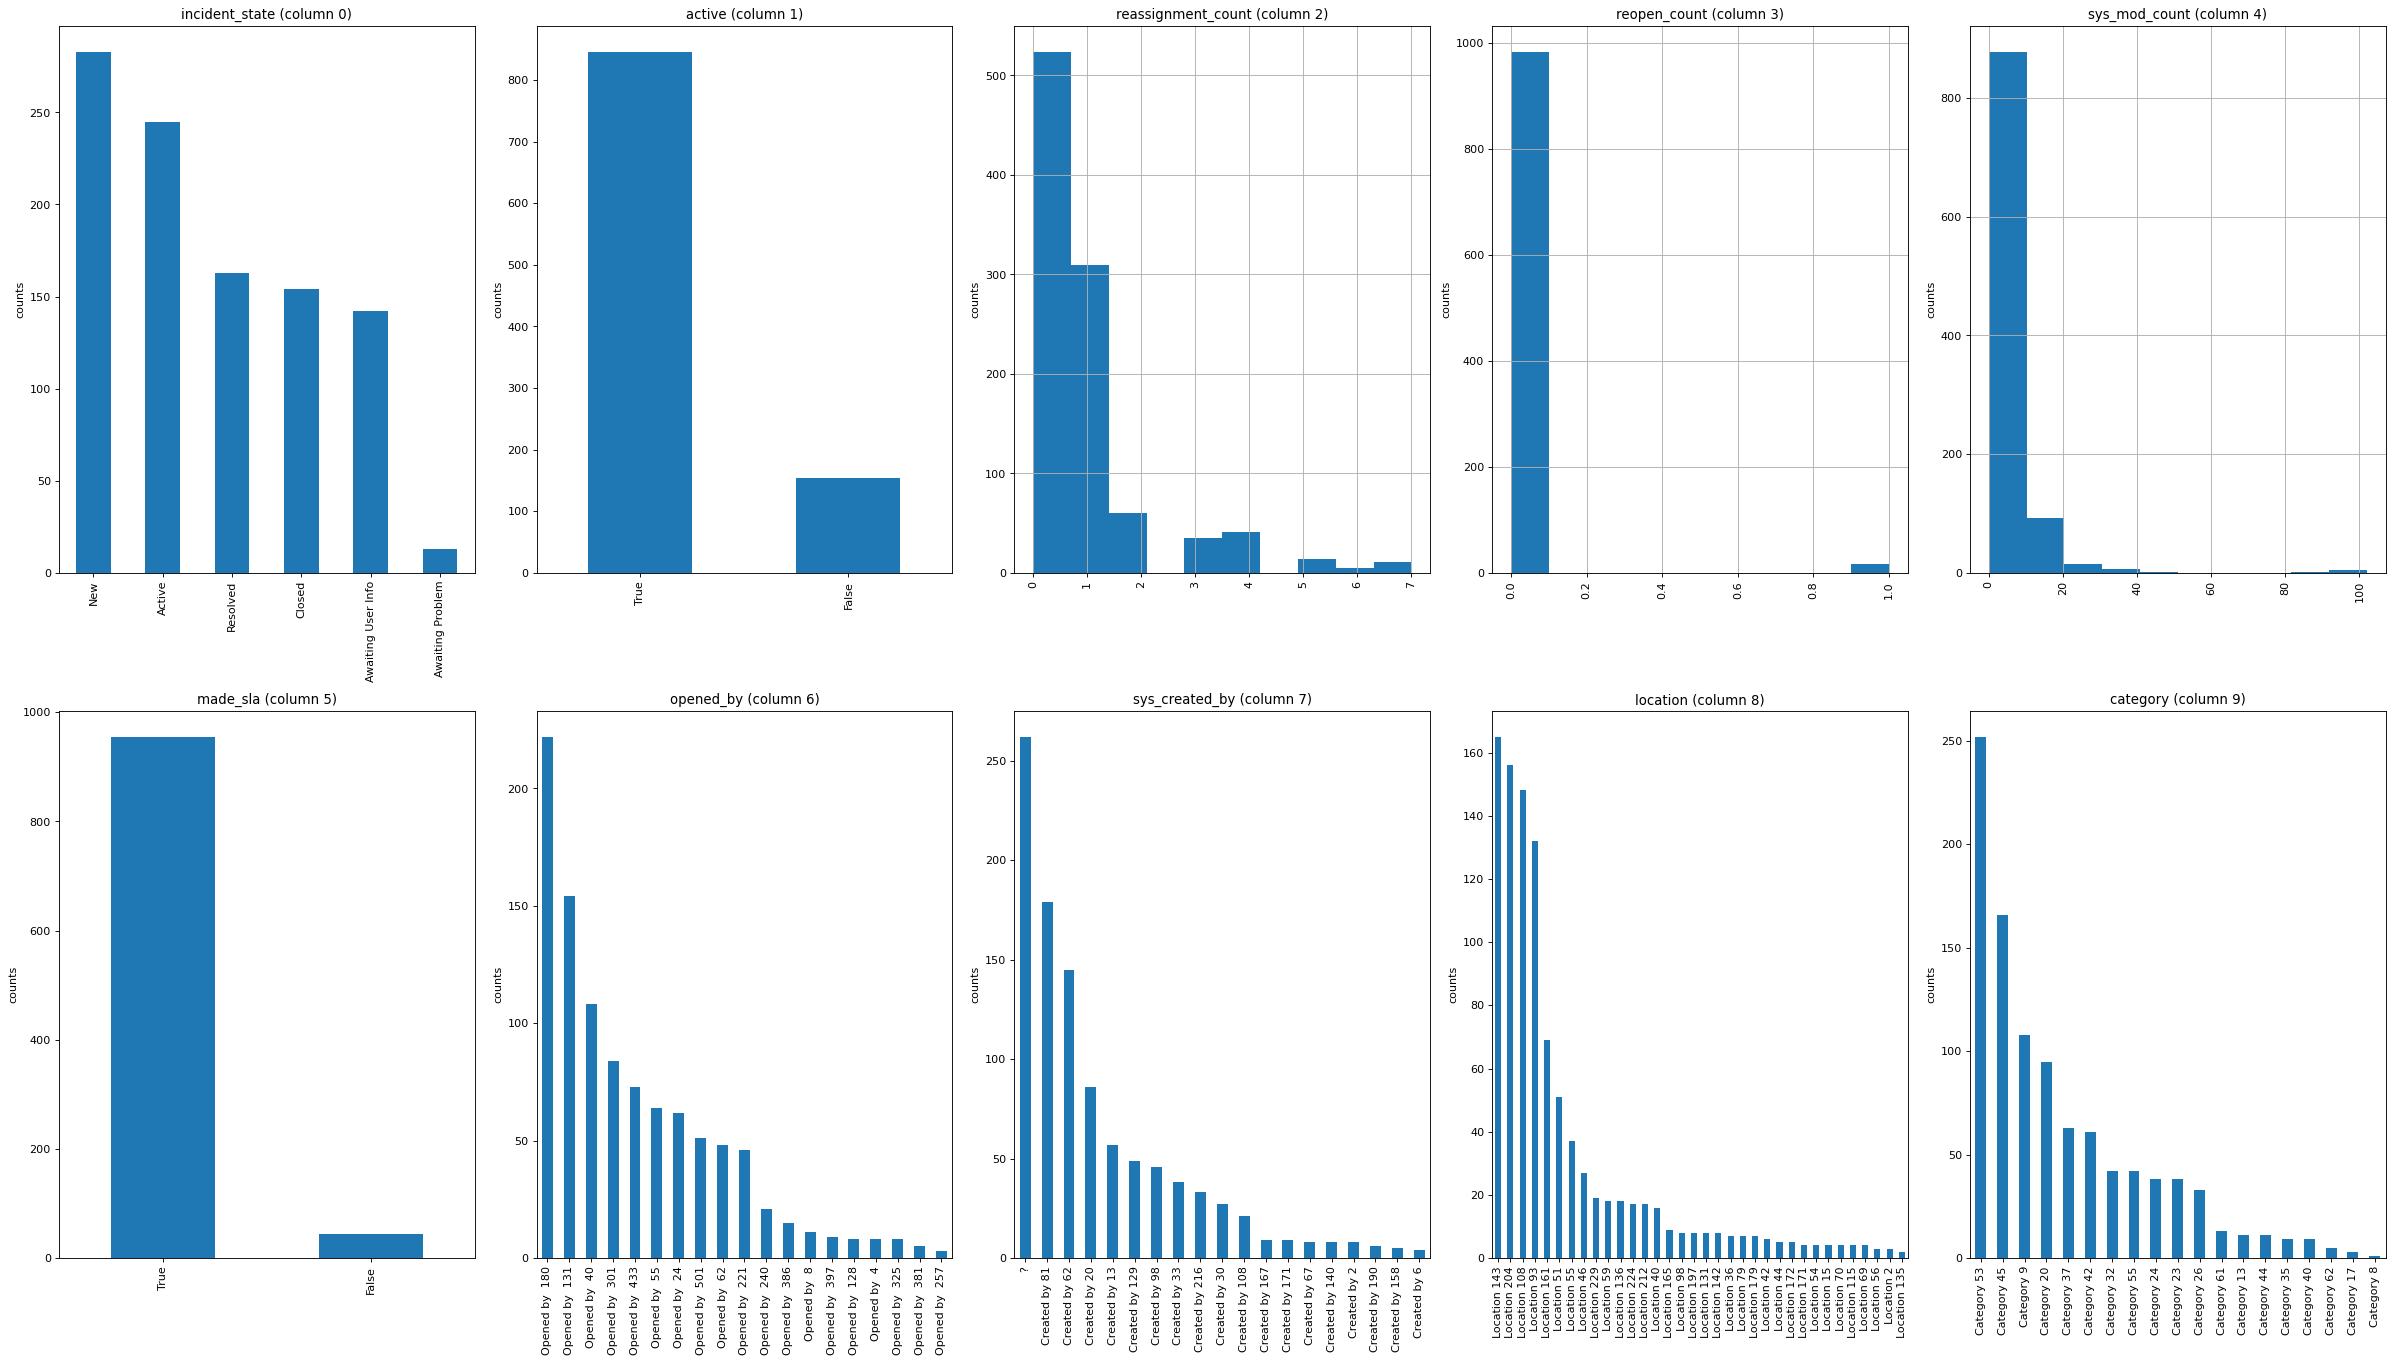

In [32]:
plotPerColumnDistribution(df1, 10, 5)

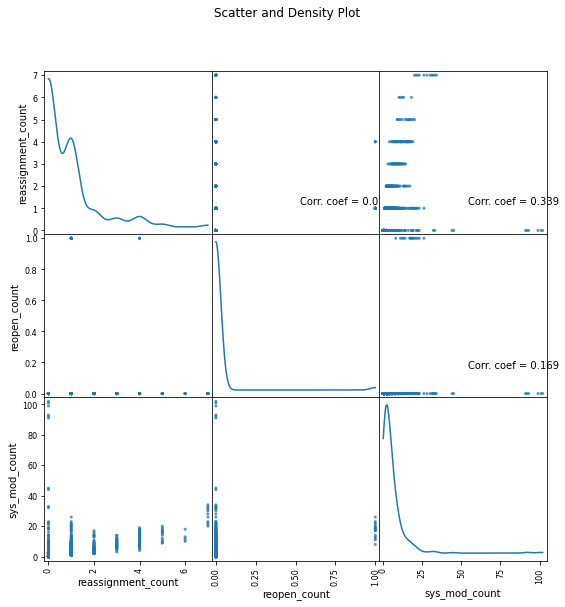

In [33]:
plotScatterMatrix(df1, 9, 10)

<AxesSubplot:xlabel='impact', ylabel='count'>

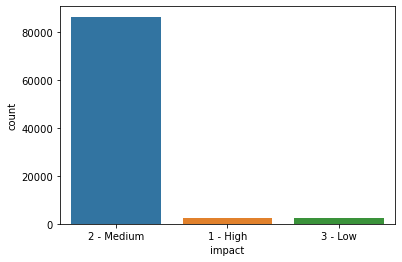

In [34]:
##Let us see the distribution of the target varibale
sns.countplot(x='impact',data=incident)

From the graph, we can see that our data is imbalanced

In [35]:
incident['impact'].value_counts(normalize=True)

2 - Medium    0.947232
3 - Low       0.027661
1 - High      0.025107
Name: impact, dtype: float64

There are more number of incidents that had Medium impact. Low and High impact incidents are observed only 2.7% and 2.4% of all the incidents.

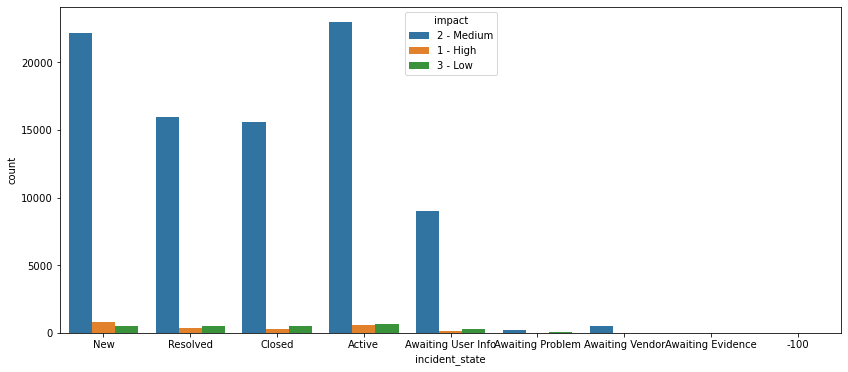

In [36]:
plt.figure(figsize=(14,6))
sns.countplot(x='incident_state',hue='impact',data=incident)
plt.show()

<AxesSubplot:xlabel='urgency', ylabel='count'>

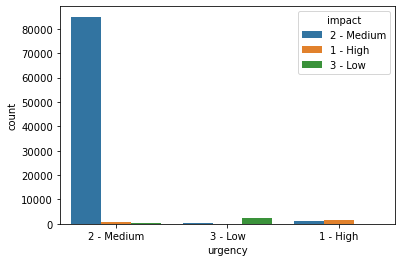

In [37]:
sns.countplot(x='urgency',hue='impact',data=incident)

We can see that events having high urgency have high impact and events having low urgency have low impact.

<AxesSubplot:xlabel='priority', ylabel='count'>

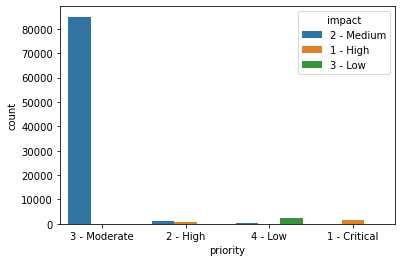

In [38]:
sns.countplot(x='priority',hue='impact',data=incident)

The events having high and critical priority have high impact, whereas low priority events have low impact.

<AxesSubplot:xlabel='impact', ylabel='count'>

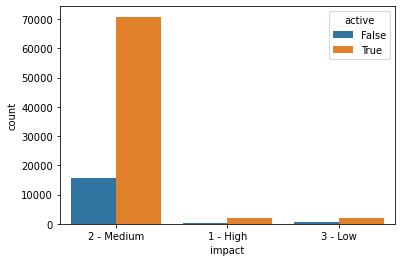

In [39]:
sns.countplot(x='impact',hue='active',data=incident)

We can see that there are more active users of moderate impact type.

In [40]:
pd.crosstab(incident['reopen_count'],incident['impact'])

impact,1 - High,2 - Medium,3 - Low
reopen_count,,,
0,2269,84907,2497
1,21,1209,26
2,0,125,0
3,0,57,0
4,0,48,0
5,0,24,0
6,0,18,0
7,0,5,0
8,0,4,0


In [41]:
pd.crosstab(incident['contact_type'],incident['impact'])

impact,1 - High,2 - Medium,3 - Low
contact_type,,,
Direct opening,0,14,0
Email,0,160,0
Phone,2275,85469,2523
Self service,15,754,0


Most of the events were resolved on phone, while few high and moderate impact events were solved by providing self-service

In [42]:
pd.crosstab(incident['knowledge'],incident['impact'],normalize=True)

impact,1 - High,2 - Medium,3 - Low
knowledge,,,
False,0.020458,0.844173,0.017542
True,0.004649,0.103059,0.010120


16% of the moderate impact incidents were resolved using knowledge based documents.

In [43]:
pd.crosstab(incident['u_priority_confirmation'],incident['impact'],normalize=True)

impact,1 - High,2 - Medium,3 - Low
u_priority_confirmation,,,
False,0.015305,0.663239,0.020699
True,0.009802,0.283993,0.006962


In [44]:
incident['notify'].value_counts()

Do Not Notify    91140
Send Email          70
Name: notify, dtype: int64

In [45]:
pd.crosstab(incident['notify'],incident['impact'],normalize=True)

impact,1 - High,2 - Medium,3 - Low
notify,,,
Do Not Notify,0.025107,0.946464,0.027661
Send Email,0.000000,0.000767,0.000000


Notifications were not generated for almost all  incidents. Hence, we can remove them as they do not have significant unique values.

As urgency and priority give us the same intuition, we can say that they exhibit collinearity. Hence, we can remove priority and u_priority_confirmation.  

In [46]:
incident=incident.drop(['notify','priority','u_priority_confirmation','urgency'],axis=1)

In [47]:
print('Number of columns after data cleaning: ',len(incident.columns))
print()
print(incident.columns)

Number of columns after data cleaning:  24

Index(['incident_state', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'made_sla', 'caller_id', 'opened_by', 'opened_at',
       'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at',
       'contact_type', 'location', 'category', 'subcategory', 'u_symptom',
       'impact', 'assignment_group', 'assigned_to', 'knowledge', 'resolved_by',
       'resolved_at'],
      dtype='object')


## Encoding variables

In [48]:
#Change the datatypes of date and time variables
incident['sys_updated_at']= pd.to_datetime(incident['sys_updated_at'])
incident['sys_created_at']= pd.to_datetime(incident['sys_created_at'])
incident['opened_at']= pd.to_datetime(incident['opened_at'])
incident['resolved_at']= pd.to_datetime(incident['resolved_at'])

In [49]:
incident_impact=incident['impact']
incident_impact=incident_impact.replace({'1 - High':1,'2 - Medium':2,'3 - Low':3,})
incident_features=incident.drop(['impact'],axis=1)


Let us extract the important part of variables or the substring from every feature.

In [50]:
incident_features['caller_id']=incident_features['caller_id'].apply(lambda x: int(x.split(' ')[-1]))
incident_features['u_symptom']=incident_features['u_symptom'].apply(lambda x: int(x.split(' ')[-1]))
incident_features['opened_by']=incident_features['opened_by'].apply(lambda x: int(x.split(' ')[-1]))
incident_features['sys_created_by']=incident_features['sys_created_by'].apply(lambda x: int(x.split(' ')[-1]))
incident_features['sys_updated_by']=incident_features['sys_updated_by'].apply(lambda x: int(x.split(' ')[-1]))
incident_features['location']=incident_features['location'].apply(lambda x: int(x.split(' ')[1]))
incident_features['category']=incident_features['category'].apply(lambda x: int(x.split(' ')[1]))
incident_features['subcategory']=incident_features['subcategory'].apply(lambda x: int(x.split(' ')[1]))
incident_features['assignment_group']=incident_features['assignment_group'].apply(lambda x: int(x.split(' ')[1]))
incident_features['assigned_to']=incident_features['assigned_to'].apply(lambda x: int(x.split(' ')[1]))
incident_features['resolved_by']=incident_features['resolved_by'].apply(lambda x: int(x.split(' ')[-1]))

In [51]:
incident_object=incident_features.select_dtypes(include='object')

#Label encoding
from sklearn.preprocessing import LabelEncoder
for col in incident_object.columns:
    incident_features[col]=LabelEncoder().fit_transform(incident_features[col])

In [52]:
incident_features.head()

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,...,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,resolved_by,resolved_at
0,7,1,0,0,0,1,2403,8,2016-02-29 01:16:00,6,...,2,143,55,170,72,56,17,1,149,2016-02-29 11:29:00
1,8,1,0,0,2,1,2403,8,2016-02-29 01:16:00,6,...,2,143,55,170,72,56,17,1,149,2016-02-29 11:29:00
2,8,1,0,0,3,1,2403,8,2016-02-29 01:16:00,6,...,2,143,55,170,72,56,17,1,149,2016-02-29 11:29:00
3,6,0,0,0,4,1,2403,8,2016-02-29 01:16:00,6,...,2,143,55,170,72,56,17,1,149,2016-02-29 11:29:00
4,7,1,0,0,0,1,2403,397,2016-02-29 04:40:00,171,...,2,165,40,215,471,70,89,1,81,2016-01-03 09:52:00


Dealing with datetime variables.

Let us split the date variables to their respective day, month, year and hour features for easy numerical encoding and analysis.

In [53]:
incident_features.select_dtypes(include=['datetime64']).columns

Index(['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at'], dtype='object')

In [54]:
#Extract day,month, year and hour for opened_at variable
incident_features["opened_day"]=incident_features['opened_at'].dt.day
incident_features["opened_month"]=incident_features['opened_at'].dt.month
incident_features["opened_year"]=incident_features['opened_at'].dt.year
incident_features["opened_hour"]=incident_features['opened_at'].dt.hour

#Extract day,month, year and hour for sys_created_at variable
incident_features["syscreated_day"]=incident_features['sys_created_at'].dt.day
incident_features["syscreated_month"]=incident_features['sys_created_at'].dt.month
incident_features["syscreated_year"]=incident_features['sys_created_at'].dt.year
incident_features["syscreated_hour"]=incident_features['sys_created_at'].dt.hour

#Extract day,month, year and hour for sys_updated_at variable
incident_features["sysupdated_day"]=incident_features['sys_updated_at'].dt.day
incident_features["sysupdated_month"]=incident_features['sys_updated_at'].dt.month
incident_features["sysupdated_year"]=incident_features['sys_updated_at'].dt.year
incident_features["sysupdated_hour"]=incident_features['sys_updated_at'].dt.hour

#Extract day,month, year and hour for resolved_at variable
incident_features["resolved_day"]=incident_features['resolved_at'].dt.day
incident_features["resolved_month"]=incident_features['resolved_at'].dt.month
incident_features["resolved_year"]=incident_features['resolved_at'].dt.year
incident_features["resolved_hour"]=incident_features['resolved_at'].dt.hour

#Drop the date columns
incident_features=incident_features.drop(['opened_at','sys_updated_at','sys_created_at','resolved_at'],axis=1)


In [55]:
incident_features.shape

(91210, 35)

## Balancing the data

In [56]:
#Seperate independent and dependent variables
X=incident_features.copy()
target=incident_impact

In [57]:
from sklearn.model_selection import train_test_split
X_train, val_features, y_train, val_impact = train_test_split(X, target, test_size=0.1,random_state=1,stratify=target)

In [58]:
print(X_train.shape, val_features.shape, y_train.shape, val_impact.shape)

(82089, 35) (9121, 35) (82089,) (9121,)


In [59]:
#Split the 100% train dataset further into 70%train and 30%test and apply smote on 80% train dataset
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train,
                                                  test_size = .3,
                                                  random_state=10)

In [60]:
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

(57462, 35) (24627, 35) (57462,) (24627,)


In [61]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x_balanced,y_balanced=oversample.fit_resample(X_train_new,y_train_new)
y_balanced=pd.Series(y_balanced)

print("Impact counts before balancing:\n ",y_train_new.value_counts())
print("Impact counts after balancing: \n",y_balanced.value_counts())

Impact counts before balancing:
  2    54437
3     1610
1     1415
Name: impact, dtype: int64
Impact counts after balancing: 
 3    54437
2    54437
1    54437
Name: impact, dtype: int64


C:\Users\Mahesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mahesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


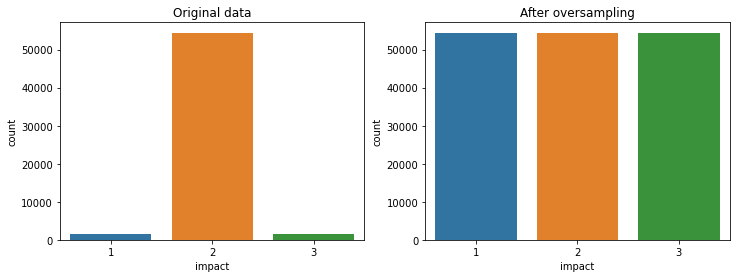

In [62]:
figure,axes=plt.subplots(1,2,figsize=(12,4))

sns.countplot(y_train_new,ax=axes[0])
axes[0].set_title('Original data')

sns.countplot(y_balanced,ax=axes[1])
axes[1].set_title('After oversampling')
plt.show()

## Feature engineering

###  Chi2 test

In [63]:
# Feature Extraction with Univariate Statistical Chi-squared Test for classification)
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=12)
fit = test.fit(x_balanced, y_balanced)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x_balanced)


[4.729e+02 5.679e+02 6.150e+03 7.911e+02 2.874e+03 5.898e+02 2.203e+06
 7.299e+05 1.623e+05 1.663e+05 7.874e-01 4.046e+04 4.135e+03 1.716e+04
 4.472e+03 1.542e+03 5.801e+04 6.286e+03 7.967e+04 1.357e+04 2.265e+03
 6.380e-04 5.612e+03 1.351e+04 2.264e+03 6.380e-04 4.874e+03 7.038e+03
 1.783e+03 8.344e-04 2.089e+03 2.153e+03 1.343e+03 9.035e-04 1.758e+03]


In [64]:
scores=fit.scores_
scores=pd.Series(scores)
scores.index=incident_features.columns
scores=scores.sort_values(ascending=False)


<AxesSubplot:>

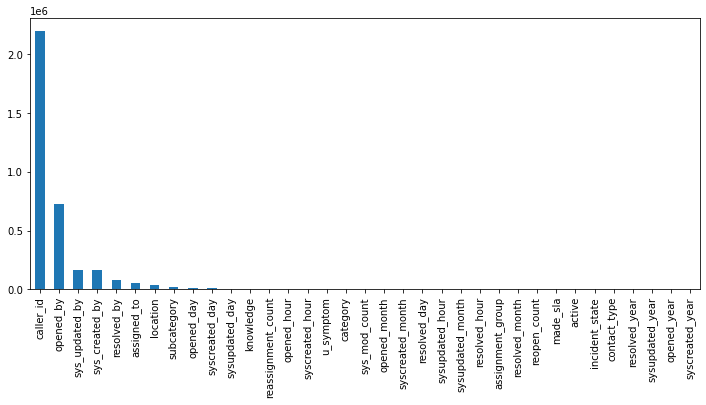

In [65]:
plt.figure(figsize=(12,5))
scores.plot.bar()

In [66]:
print(scores[:16])

caller_id             2.202790e+06
opened_by             7.299256e+05
sys_updated_by        1.663086e+05
sys_created_by        1.623142e+05
resolved_by           7.967417e+04
assigned_to           5.801088e+04
location              4.046171e+04
subcategory           1.716324e+04
opened_day            1.356509e+04
syscreated_day        1.351441e+04
sysupdated_day        7.038335e+03
knowledge             6.285545e+03
reassignment_count    6.150357e+03
opened_hour           5.611584e+03
syscreated_hour       4.874351e+03
u_symptom             4.472380e+03
dtype: float64


###  Mutual information classification

In [67]:
from sklearn.feature_selection import mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif, k=15)
fs.fit(x_balanced, y_balanced)
X_train_fs = fs.transform(x_balanced)
print(fs.scores_)

[0.073 0.015 0.013 0.003 0.036 0.024 0.456 0.487 0.231 0.324 0.017 0.163
 0.178 0.189 0.151 0.186 0.257 0.024 0.299 0.067 0.034 0.012 0.082 0.068
 0.034 0.012 0.081 0.052 0.026 0.01  0.043 0.051 0.025 0.009 0.046]


In [68]:
X.columns[fs.get_support()]

Index(['incident_state', 'caller_id', 'opened_by', 'sys_created_by',
       'sys_updated_by', 'location', 'category', 'subcategory', 'u_symptom',
       'assignment_group', 'assigned_to', 'resolved_by', 'opened_hour',
       'syscreated_day', 'syscreated_hour'],
      dtype='object')

###  Feature Importance using Decision Tree

In [69]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier()
fit=model.fit(x_balanced, y_balanced)
print(model.feature_importances_)

[4.277e-03 4.908e-04 9.904e-03 3.215e-03 2.332e-02 3.722e-03 7.697e-02
 2.425e-01 3.147e-02 1.315e-02 2.193e-04 3.711e-02 4.850e-02 4.620e-02
 3.059e-02 9.872e-02 1.864e-02 3.102e-02 4.520e-02 1.353e-02 1.336e-02
 1.727e-05 3.971e-02 2.357e-02 7.146e-03 3.858e-05 5.559e-02 4.417e-03
 2.788e-03 2.495e-04 4.379e-03 3.269e-02 2.267e-02 5.437e-04 1.401e-02]


In [70]:
features_imp=model.feature_importances_
features_imp=pd.Series(features_imp)
features_imp.index=incident_features.columns
features_imp=features_imp.sort_values(ascending=False)


<AxesSubplot:>

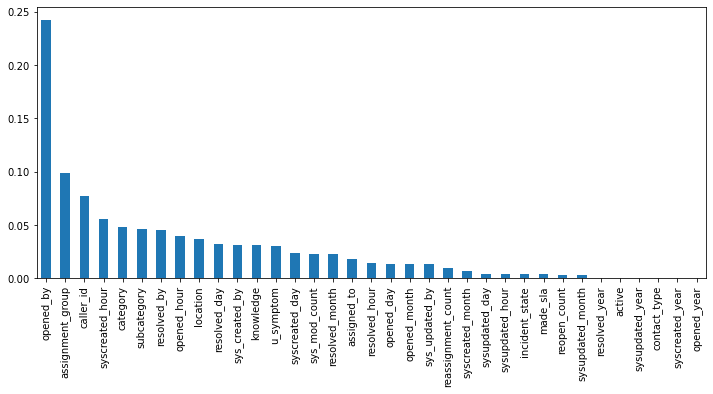

In [71]:
plt.figure(figsize=(12,5))
features_imp.plot.bar()

In [72]:
print(features_imp[:16])

opened_by           0.242548
assignment_group    0.098723
caller_id           0.076967
syscreated_hour     0.055593
category            0.048497
subcategory         0.046203
resolved_by         0.045203
opened_hour         0.039714
location            0.037110
resolved_day        0.032692
sys_created_by      0.031471
knowledge           0.031016
u_symptom           0.030594
syscreated_day      0.023570
sys_mod_count       0.023322
resolved_month      0.022675
dtype: float64


In [73]:
#Top 15 selected features from each model
chi2_features=scores[:13].to_dict()
chi2_features=set(chi2_features.keys())

mutualinfo_features=set(X.columns[fs.get_support()])

rfe_features=features_imp[:13].to_dict()
rfe_features=set(rfe_features.keys())

In [74]:
#Use intersection fuction to get the common features from all the three sets
chi2_features = chi2_features.intersection(mutualinfo_features)
output_set = chi2_features.intersection(rfe_features)
output_list = list(output_set)
print(output_list)

['resolved_by', 'subcategory', 'location', 'opened_by', 'sys_created_by', 'caller_id']


Therefore, we select the following features to predict the impact.


*   opened_by,resolved_by,caller_id,sys_created_by,subcategory,location




Also, there are other important variables like location, opened_hour and sys_updated_by by comparing columns from features selection methods chi2 and mutual_info.

In [75]:
#Let us create a dataframe having significant features in train and test datasets
columns=['opened_by', 'resolved_by', 'caller_id', 'sys_created_by', 'subcategory', 'location','sys_updated_by','opened_hour','assigned_to']
X_train_new=X_train_new[columns]
X_test_new=X_test_new[columns]
X_train=X_train[columns]
val_features=val_features[columns]

In [76]:
X.shape

(91210, 35)

In [77]:
x_balanced=pd.DataFrame(x_balanced,columns=X.columns)
x_balanced=x_balanced[columns]
x_balanced.shape

(163311, 9)

In [78]:
x_balanced.head()

,opened_by,resolved_by,caller_id,sys_created_by,subcategory,location,sys_updated_by,opened_hour,assigned_to
0,390,206,2648,169,174,204,859,15,227
1,239,213,771,107,233,93,908,11,234
2,17,33,5242,10,164,108,137,15,34
3,397,15,459,171,125,143,908,14,17
4,131,66,4804,10,223,93,265,8,17


In [79]:
x_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163311 entries, 0 to 163310
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   opened_by       163311 non-null  int64
 1   resolved_by     163311 non-null  int64
 2   caller_id       163311 non-null  int64
 3   sys_created_by  163311 non-null  int64
 4   subcategory     163311 non-null  int64
 5   location        163311 non-null  int64
 6   sys_updated_by  163311 non-null  int64
 7   opened_hour     163311 non-null  int64
 8   assigned_to     163311 non-null  int64
dtypes: int64(9)
memory usage: 11.2 MB


## Model building


###  Random-forest classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,accuracy_score, classification_report, confusion_matrix
rf_clf = RandomForestClassifier(n_estimators=30, random_state=12)
model_rf=rf_clf.fit(x_balanced, y_balanced)

In [81]:
model_rf

RandomForestClassifier(n_estimators=30, random_state=12)

In [82]:
y_pred_rf = model_rf.predict(X_test_new)
val_pred_rf = model_rf.predict(val_features)

# Finding accuracy, precision, recall and confusion matrix
print('Test results: ')
print(recall_score(y_test_new, y_pred_rf,average='macro'))
print(accuracy_score(y_test_new,y_pred_rf))
print(classification_report(y_test_new,y_pred_rf))

print('\n Validation results')
print(recall_score(val_impact, val_pred_rf,average='macro'))
print(accuracy_score(val_impact,val_pred_rf))
print(classification_report(val_impact,val_pred_rf))

Test results: 
0.9123522927454563
0.9842449344215698
              precision    recall  f1-score   support

           1       0.82      0.83      0.83       646
           2       0.99      0.99      0.99     23320
           3       0.83      0.91      0.87       661

    accuracy                           0.98     24627
   macro avg       0.88      0.91      0.90     24627
weighted avg       0.98      0.98      0.98     24627


 Validation results
0.8695519300231819
0.9811424185944524
              precision    recall  f1-score   support

           1       0.78      0.73      0.76       229
           2       0.99      0.99      0.99      8640
           3       0.84      0.89      0.86       252

    accuracy                           0.98      9121
   macro avg       0.87      0.87      0.87      9121
weighted avg       0.98      0.98      0.98      9121



In [83]:
x_balanced.head(90)

,opened_by,resolved_by,caller_id,sys_created_by,subcategory,location,sys_updated_by,opened_hour,assigned_to
0,390,206,2648,169,174,204,859,15,227
1,239,213,771,107,233,93,908,11,234
2,17,33,5242,10,164,108,137,15,34
3,397,15,459,171,125,143,908,14,17
4,131,66,4804,10,223,93,265,8,17
...,...,...,...,...,...,...,...,...,...
85,242,32,2781,109,28,204,469,8,33
86,397,208,796,171,175,93,746,15,229
87,397,15,1248,171,174,204,746,15,17
88,17,182,5368,89,174,143,370,10,200


In [84]:
y_p1=pd.Series(y_pred_rf)


In [85]:
y_p2=pd.DataFrame(y_p1,columns=['p1'])

In [86]:
y_p2

,p1
0,2
1,2
2,1
3,2
4,2
...,...
24622,2
24623,2
24624,2
24625,2


In [87]:
print(y_p2[y_p2['p1'] == 3])

       p1
27      3
45      3
64      3
89      3
118     3
...    ..
24385   3
24403   3
24551   3
24559   3
24602   3

[725 rows x 1 columns]


In [88]:
# Finding accuracy, precision, recall and confusion matrix
y_pred = model_rf.predict(x_balanced)

print(accuracy_score(y_balanced,y_pred))
print(classification_report(y_balanced,y_pred))

0.9986773701710234
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     54437
           2       1.00      1.00      1.00     54437
           3       1.00      1.00      1.00     54437

    accuracy                           1.00    163311
   macro avg       1.00      1.00      1.00    163311
weighted avg       1.00      1.00      1.00    163311



In [89]:
confusion_matrix(val_impact,val_pred_rf)

array([[ 167,   60,    2],
       [  42, 8558,   40],
       [   4,   24,  224]], dtype=int64)

In [90]:
 confusion_matrix(y_test_new,y_pred_rf)

array([[  539,   103,     4],
       [  105, 23097,   118],
       [   11,    47,   603]], dtype=int64)

In [91]:
from sklearn.metrics import f1_score
acc_rf=round(accuracy_score(val_impact,val_pred_rf)*100.0,2)
train_accrf=round(accuracy_score(y_balanced,y_pred)*100.0,2)
f1_rf=round(f1_score(y_balanced, y_pred, average='macro'),4)

###  Decision-tree classifier

In [92]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
dtree_clf=DecisionTreeClassifier()
model_dtree=dtree_clf.fit(x_balanced,y_balanced)

In [93]:
y_pred_dtree = model_dtree.predict(X_test_new)
val_pred_dtree = model_dtree.predict(val_features)

# Finding accuracy, precision, recall and confusion matrix
print('Test results: ')
print(recall_score(y_test_new, y_pred_dtree,average='macro'))
print(accuracy_score(y_test_new,y_pred_dtree))
print(classification_report(y_test_new,y_pred_dtree))

print('\n Validation results')
print(recall_score(val_impact, val_pred_dtree,average='macro'))
print(accuracy_score(val_impact,val_pred_dtree))
print(classification_report(val_impact,val_pred_dtree))

Test results: 
0.8831628745884822
0.9676777520607464
              precision    recall  f1-score   support

           1       0.59      0.79      0.68       646
           2       0.99      0.97      0.98     23320
           3       0.70      0.88      0.78       661

    accuracy                           0.97     24627
   macro avg       0.76      0.88      0.81     24627
weighted avg       0.97      0.97      0.97     24627


 Validation results
0.8701248093851807
0.9684245148558273
              precision    recall  f1-score   support

           1       0.60      0.77      0.67       229
           2       0.99      0.98      0.98      8640
           3       0.71      0.87      0.78       252

    accuracy                           0.97      9121
   macro avg       0.77      0.87      0.81      9121
weighted avg       0.97      0.97      0.97      9121



In [94]:
confusion_matrix(val_impact,val_pred_dtree)

array([[ 176,   50,    3],
       [ 115, 8439,   86],
       [   4,   30,  218]], dtype=int64)

In [95]:
y_pred_dt = model_dtree.predict(x_balanced)

# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_balanced,y_pred_dt))
print(classification_report(y_balanced,y_pred_dt))

0.9986896167435139
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     54437
           2       1.00      1.00      1.00     54437
           3       1.00      1.00      1.00     54437

    accuracy                           1.00    163311
   macro avg       1.00      1.00      1.00    163311
weighted avg       1.00      1.00      1.00    163311



In [96]:
acc_dt=round(accuracy_score(val_impact,val_pred_dtree)*100.0,2)
train_accdt=round(accuracy_score(y_balanced,y_pred_dt)*100.0,2)
f1_dt=round(f1_score(y_balanced, y_pred_dt, average='macro'),4)

### Logistic regression

In [97]:
# Training the model
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
model_logreg=log_reg.fit(x_balanced,y_balanced)

C:\Users\Mahesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
train_pred_logreg = model_logreg.predict(x_balanced)

print('Train results: ')
print(recall_score(y_balanced, train_pred_logreg,average='macro'))
print(accuracy_score(y_balanced,train_pred_logreg))
print(classification_report(y_balanced,train_pred_logreg))

Train results: 
0.4496880185658039
0.44968801856580387
              precision    recall  f1-score   support

           1       0.42      0.41      0.41     54437
           2       0.46      0.42      0.44     54437
           3       0.47      0.52      0.49     54437

    accuracy                           0.45    163311
   macro avg       0.45      0.45      0.45    163311
weighted avg       0.45      0.45      0.45    163311



In [99]:
# Finding accuracy, precision, recall and confusion matrix
y_pred_logreg = model_logreg.predict(X_test_new)
val_pred_logreg = model_logreg.predict(val_features)

print('Test results: ')
print(recall_score(y_test_new, y_pred_logreg,average='macro'))
print(accuracy_score(y_test_new,y_pred_logreg))
print(classification_report(y_test_new,y_pred_logreg))

print('\n Validation results')
print(recall_score(val_impact, val_pred_logreg,average='macro'))
print(accuracy_score(val_impact,val_pred_logreg))
print(classification_report(val_impact,val_pred_logreg))

Test results: 
0.4424483212184375
0.42169163925772524
              precision    recall  f1-score   support

           1       0.04      0.39      0.07       646
           2       0.97      0.42      0.59     23320
           3       0.04      0.52      0.08       661

    accuracy                           0.42     24627
   macro avg       0.35      0.44      0.25     24627
weighted avg       0.92      0.42      0.56     24627


 Validation results
0.42735929160601654
0.4190330007674597
              precision    recall  f1-score   support

           1       0.03      0.34      0.06       229
           2       0.97      0.42      0.58      8640
           3       0.05      0.53      0.08       252

    accuracy                           0.42      9121
   macro avg       0.35      0.43      0.24      9121
weighted avg       0.92      0.42      0.56      9121



In [100]:
confusion_matrix(val_impact,val_pred_logreg)

array([[  77,   83,   69],
       [2336, 3612, 2692],
       [  73,   46,  133]], dtype=int64)

In [101]:
acc_logreg=round(accuracy_score(val_impact,val_pred_logreg)*100.0,2)
train_acclogreg=round(accuracy_score(y_balanced,train_pred_logreg)*100.0,2)
f1_logreg=round(f1_score(y_balanced, train_pred_logreg, average='macro'),4)

###  Multinomial Naive Bayes

In [102]:
# Training the model
from sklearn.naive_bayes import MultinomialNB
multi_nb=MultinomialNB()
model_mlnb=multi_nb.fit(x_balanced,y_balanced)

In [103]:
y_predmlnb = model_mlnb.predict(x_balanced)

print(accuracy_score(y_balanced,y_predmlnb))
print(classification_report(y_balanced,y_predmlnb))

0.4106826851834843
              precision    recall  f1-score   support

           1       0.39      0.38      0.38     54437
           2       0.44      0.32      0.37     54437
           3       0.41      0.53      0.46     54437

    accuracy                           0.41    163311
   macro avg       0.41      0.41      0.41    163311
weighted avg       0.41      0.41      0.41    163311



In [104]:
y_pred_multi_nb = model_mlnb.predict(X_test_new)
val_pred_multi_nb = model_mlnb.predict(val_features)

# Finding accuracy, precision, recall and confusion matrix
print('Test results: ')
print(recall_score(y_test_new, y_pred_multi_nb,average='macro'))
print(accuracy_score(y_test_new,y_pred_multi_nb))
print(classification_report(y_test_new,y_pred_multi_nb))

print('\n Validation results')
print(recall_score(val_impact, val_pred_multi_nb,average='macro'))
print(accuracy_score(val_impact,val_pred_multi_nb))
print(classification_report(val_impact,val_pred_multi_nb))

Test results: 
0.40260248256889236
0.32119218743655337
              precision    recall  f1-score   support

           1       0.03      0.38      0.06       646
           2       0.97      0.31      0.47     23320
           3       0.04      0.51      0.07       661

    accuracy                           0.32     24627
   macro avg       0.34      0.40      0.20     24627
weighted avg       0.92      0.32      0.45     24627


 Validation results
0.3694109183783492
0.3241969082337463
              precision    recall  f1-score   support

           1       0.02      0.29      0.04       229
           2       0.96      0.32      0.48      8640
           3       0.04      0.50      0.07       252

    accuracy                           0.32      9121
   macro avg       0.34      0.37      0.20      9121
weighted avg       0.92      0.32      0.46      9121



In [105]:
confusion_matrix(val_impact,val_pred_multi_nb)

array([[  66,   66,   97],
       [2576, 2765, 3299],
       [  90,   36,  126]], dtype=int64)

In [106]:
acc_multinb=round(accuracy_score(val_impact,val_pred_multi_nb)*100.0,2)
train_accmnb=round(accuracy_score(y_balanced,y_predmlnb)*100.0,2)
f1_mnb=round(f1_score(y_balanced, y_predmlnb, average='macro'),4)

###  Gaussian Naive Bayes

In [107]:
# Training the model
from sklearn.naive_bayes import GaussianNB
gauss_nb=GaussianNB()
model_gsnb=gauss_nb.fit(x_balanced,y_balanced)

In [108]:
y_predgsnb = model_gsnb.predict(x_balanced)

print(accuracy_score(y_balanced,y_predgsnb))
print(classification_report(y_balanced,y_predgsnb))

0.4966964870706811
              precision    recall  f1-score   support

           1       0.53      0.45      0.48     54437
           2       0.45      0.61      0.52     54437
           3       0.54      0.44      0.48     54437

    accuracy                           0.50    163311
   macro avg       0.51      0.50      0.49    163311
weighted avg       0.51      0.50      0.49    163311



In [109]:
y_pred_gauss_nb = model_gsnb.predict(X_test_new)
val_pred_gauss_nb = model_gsnb.predict(val_features)

# Finding accuracy, precision, recall and confusion matrix
print('Test results: ')
print(recall_score(y_test_new, y_pred_gauss_nb,average='macro'))
print(accuracy_score(y_test_new,y_pred_gauss_nb))
print(classification_report(y_test_new,y_pred_gauss_nb))

print('\n Validation results')
print(recall_score(val_impact, val_pred_gauss_nb,average='macro'))
print(accuracy_score(val_impact,val_pred_gauss_nb))
print(classification_report(val_impact,val_pred_gauss_nb))

Test results: 
0.47059203279385864
0.592114346042961
              precision    recall  f1-score   support

           1       0.06      0.46      0.11       646
           2       0.97      0.60      0.74     23320
           3       0.04      0.35      0.08       661

    accuracy                           0.59     24627
   macro avg       0.36      0.47      0.31     24627
weighted avg       0.92      0.59      0.71     24627


 Validation results
0.46431418617099113
0.5931367174651903
              precision    recall  f1-score   support

           1       0.05      0.42      0.10       229
           2       0.96      0.60      0.74      8640
           3       0.05      0.37      0.08       252

    accuracy                           0.59      9121
   macro avg       0.36      0.46      0.31      9121
weighted avg       0.92      0.59      0.71      9121



In [110]:
confusion_matrix(val_impact,val_pred_gauss_nb)

array([[  97,   94,   38],
       [1617, 5221, 1802],
       [  56,  104,   92]], dtype=int64)

In [111]:
acc_gaussnb=round(accuracy_score(val_impact,val_pred_gauss_nb)*100.0,2)
train_accgnb=round(accuracy_score(y_balanced,y_predgsnb)*100.0,2)
f1_gnb=round(f1_score(y_balanced, y_predgsnb, average='macro'),4)

### XGBoost classifier

In [112]:
#from xgboost import XGBClassifier
#xgb = XGBClassifier()
#model_xgb=xgb.fit(x_balanced,y_balanced)


In [113]:
#y_predxgb = model_xgb.predict(x_balanced)

#print(accuracy_score(y_balanced,y_predxgb))
#print(classification_report(y_balanced,y_predxgb))

In [114]:
#y_pred_xgb= model_xgb.predict(X_test_new)
#val_pred_xgb = model_xgb.predict(val_features)

# Finding accuracy, precision, recall and confusion matrix
#print('Test results: ')
#print(recall_score(y_test_new, y_pred_xgb,average='macro'))
#print(accuracy_score(y_test_new,y_pred_xgb))
#print(classification_report(y_test_new,y_pred_xgb))

#print('\n Validation results')
#print(recall_score(val_impact, val_pred_xgb,average='macro'))
#print(accuracy_score(val_impact,val_pred_xgb))
#print(classification_report(val_impact,val_pred_xgb))

In [115]:
#confusion_matrix(val_impact,val_pred_xgb)

In [116]:
#acc_xgb=round(accuracy_score(val_impact,val_pred_xgb)*100.0,2)
#train_accxgb=round(accuracy_score(y_balanced,y_predxgb)*100.0,2)
#f1_xgb=round(f1_score(y_balanced, y_predxgb, average='macro'),4)

### Gradient boosting Classifier

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb_clf=gb.fit(x_balanced,y_balanced)

In [118]:
y_predgb = gb_clf.predict(x_balanced)

print(accuracy_score(y_balanced,y_predgb))
print(classification_report(y_balanced,y_predgb))

0.8321117377274035
              precision    recall  f1-score   support

           1       0.80      0.82      0.81     54437
           2       0.84      0.81      0.82     54437
           3       0.86      0.87      0.87     54437

    accuracy                           0.83    163311
   macro avg       0.83      0.83      0.83    163311
weighted avg       0.83      0.83      0.83    163311



In [119]:
y_pred_gb= gb_clf.predict(X_test_new.values)
val_pred_gb = gb_clf.predict(val_features.values)

# Finding accuracy, precision, recall and confusion matrix
print('Test results: ')
print(recall_score(y_test_new, y_pred_gb,average='macro'))
print(accuracy_score(y_test_new,y_pred_gb))
print(classification_report(y_test_new,y_pred_gb))

print('\n Validation results')
print(recall_score(val_impact, val_pred_gb,average='macro'))
print(accuracy_score(val_impact,val_pred_gb))
print(classification_report(val_impact,val_pred_gb))

Test results: 
0.770661461857253
0.8039956145693751
              precision    recall  f1-score   support

           1       0.13      0.66      0.21       646
           2       0.99      0.81      0.89     23320
           3       0.25      0.84      0.38       661

    accuracy                           0.80     24627
   macro avg       0.45      0.77      0.50     24627
weighted avg       0.95      0.80      0.86     24627


 Validation results
0.7508243368914767
0.807586887402697
              precision    recall  f1-score   support

           1       0.12      0.61      0.20       229
           2       0.99      0.81      0.89      8640
           3       0.25      0.83      0.38       252

    accuracy                           0.81      9121
   macro avg       0.45      0.75      0.49      9121
weighted avg       0.95      0.81      0.86      9121



In [120]:
confusion_matrix(val_impact,val_pred_gb)

array([[ 139,   72,   18],
       [1005, 7017,  618],
       [  24,   18,  210]], dtype=int64)

In [121]:
acc_gb=round(accuracy_score(val_impact,val_pred_gb)*100.0,2)
train_accgb=round(accuracy_score(y_balanced,y_predgb)*100.0,2)
f1_gb=round(f1_score(y_balanced, y_predgb, average='macro'),4)

## Accuracy Table

In [123]:
data = {"MODEL":pd.Series(["Random forest","Decision tree","Logistic regression",'Multinomial NB',
        "Gaussian NB",'Gradient boosting']),
        "Test Accuracy":pd.Series([acc_rf,acc_dt,acc_logreg,acc_multinb,acc_gaussnb,acc_gb]),
        'Train Accuracy':pd.Series([train_accrf,train_accdt,train_acclogreg,train_accmnb,train_accgnb,train_accgb]),
        'f1 score': pd.Series([f1_rf,f1_dt,f1_logreg,f1_mnb,f1_gnb,f1_gb])}
table=pd.DataFrame(data)
table

,MODEL,Test Accuracy,Train Accuracy,f1 score
0,Random forest,98.11,99.87,0.9987
1,Decision tree,96.84,99.87,0.9987
2,Logistic regression,41.90,44.97,0.4484
3,Multinomial NB,32.42,41.07,0.4062
4,Gaussian NB,59.31,49.67,0.4947
5,Gradient boosting,80.76,83.21,0.8321


**Impact prediction using Random forest model showed the highest accuracy and f1-score. Therefore, this model is used for deployment to predict the impact of the incidents. (High,Medium and Low)**

## Pickle File

In [127]:
import pickle as p
p_out  = open("model_rf.pkl", "wb")
p.dump(model_rf, p_out)
p_out.close()